## Life Expentancy vs GDP

This project is intended to be an oppotunity to analyse and experiment with real data. 

* Goals -> Understand the data set and how the life expentancy is linked to the GDP.
* Data -> all_data.csv
* Analysis

### Define required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from aquarel import load_theme

### Load the data

In [2]:
df = pd.read_csv('all_data.csv')

df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Explore the data

As the first rows doesn't really tell us if the there are missing or null values, let's use the funtion info() to get a better sense of the data we are going to explore.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Looking at the output, we see that our data set has 96 entries/rows, with no null values. Already a good start! But let's get a better sense of the distribution of the data for each one of the fields by using the function describe()

In [4]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


The table above is giving me some interesting information already. However, I don't know much about the field Country. How many countries are included in this data set?

In [5]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

Now we seem to have a better idea of what we can check on this data. If we want to compare the life expentancy at birth with the GDP, we cannot do it directly, because our data set is also divided by country. 

One of the most obvious options might be to create a subplot per country, and see the results side by side.

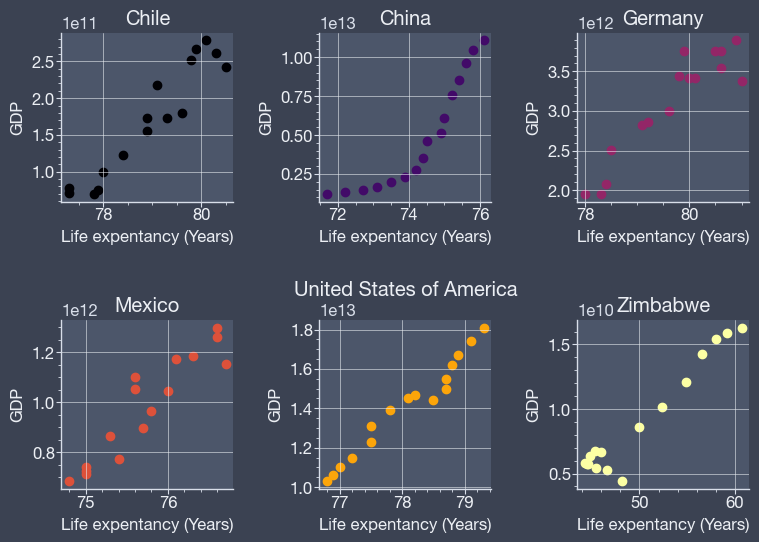

In [10]:
i = 1

plt.close('all')

# Let's choose the colors for the different charts. Note that you can choose other colormaps from https://matplotlib.org/stable/users/explain/colors/colormaps.html
colormap = cm.get_cmap('inferno') 
colors = colormap(np.linspace(0, 1, len(df.Country.unique()))) 

with load_theme("arctic_dark"):
    for country, color in zip(df.Country.unique(), colors):
        plt.subplot(2, 3, i)
        
        plt.scatter(df[df.Country == country]['Life expectancy at birth (years)'], df[df.Country == country]['GDP'], color = color)
        plt.title(country)
        plt.xlabel('Life expentancy (Years)')
        plt.ylabel('GDP')
        i += 1

    # Let's adjust the size of the image, for clarity. 
    plt.subplots_adjust(wspace = 0.5, hspace=0.7, right = 1.2, top = 1, bottom = 0.05)
    plt.show()

Looking at the subplots we see that, in general, there seems to be a correlation between a higher GDP and a higher life expentancy in all the countries. Although, Zimbabwe seems to have a different behaviour on the lowest GDP values.

However, if we look at the charts side by side, we might have the false impression of comparing the same GDPs and life expentancies for each country. Let's plot all the countries together, and see the differences between them. 

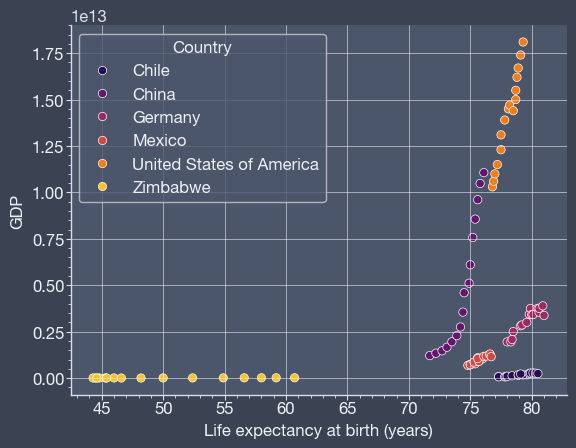

In [8]:
# scatter plot with a visual cue
sns.scatterplot(y = 'GDP', x = 'Life expectancy at birth (years)', hue = 'Country', palette = 'inferno', data = df)
plt.show()

Now looking at the chart above we can see that, although China and the United States of America have higher GDP, the life expentancy is similar, even higher in some cases, for Mexico, Germany and Chile, where people seem to life longer, with lower GDP. 